# Zeeman and spin-orbit effects in the Andreev spectra of nanowire junctions
## Numerical code and figures
### Bernard van Heck, Jukka Vayrynen and Leonid Glazman

This notebook contains the code necessary to reproduce those figures in the paper which are based on numerical data.
The execution of cells which compute datasets may take from several minutes up to about an hour (on a laptop).

In [62]:
%load_ext autoreload
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import andreev_spectrum_wire_model as awm
from matplotlib import rc
from scipy.optimize import fmin

In [66]:
%autoreload

In [56]:
rc('text.latex', preamble=r'\usepackage{color}')
fparams = {'axes.labelsize': 18,
           'axes.titlesize': 18,
           'font.size': 18,
           'legend.fontsize': 16,
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'text.usetex': True,
           'image.cmap': 'seismic'}
plt.rcParams.update(fparams)

## Magnetic field dependence of ABS: high $\mu$ regime

In [19]:
p_highmu = awm.SimpleNamespace(tau=0.75, phi=np.pi, regime='high_mu', a=0.5, b=0.)
field_scan_high_mu = awm.one_parameter_scan(p_highmu, 'b', 0, 1, 300, plot=False, nsamples=300)

In [24]:
fields = np.linspace(0, 1, 300)
gaps = []
for b in fields:
    p_highmu.b = b
    gaps.append(awm.compute_gap(p_highmu))
gaps = np.array(gaps)
bound_state_energies = field_scan_high_mu[0]
avg_energies = np.mean(bound_state_energies, axis=0)
diff_energies = np.diff(bound_state_energies, axis=0)[0]

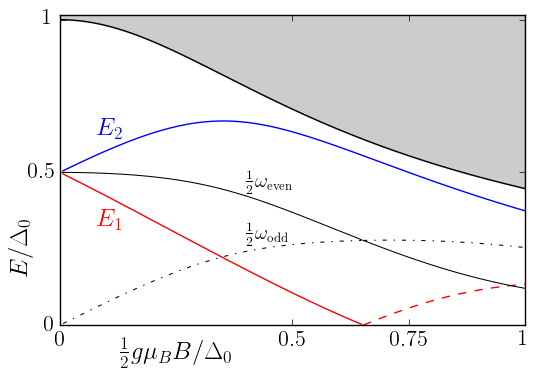

In [25]:
plt.plot(fields[:195], bound_state_energies[0][:195], c='r')
plt.plot(fields[195:], bound_state_energies[0][195:], c='r', ls='--')
plt.plot(fields, bound_state_energies[1], c='b')
plt.plot(fields[:195], avg_energies[:195], c='k', lw=0.75)
plt.plot(fields[195:], 0.5 * diff_energies[195:], c='k', lw=0.75)
plt.plot(fields[:195], 0.5 * diff_energies[:195], c='k', ls='-.', lw=0.75)
plt.plot(fields[195:], avg_energies[195:], c='k', ls='-.', lw=0.75)
plt.plot(fields, gaps, c='k')
plt.fill_between(fields, gaps, 1.02, color='k', alpha=0.2)
plt.xticks([0, 0.5, 0.75, 1], [r'$0$', r'$0.5$', r'$0.75$', r'$1$'])
plt.xlim([0, 1])
plt.yticks([0, 0.5, 1], [r'$0$', r'$0.5$', r'$1$'])
plt.ylim([0, 1.015])
plt.xlabel(r'$\frac{1}{2}g\mu_BB/\Delta_0$', x=0.25, labelpad=-5)
plt.ylabel(r'$E/\Delta_0$', y=0.25, labelpad=-6)
plt.text(0.08, 0.31, r'$E_1$', color='r')
plt.text(0.08, 0.61, r'$E_2$', color='b')
plt.text(0.4, 0.43, r'\Large{$\frac{1}{2}\omega_\textrm{\small{even}}$}', color='k')
plt.text(0.4, 0.26, r'\Large{$\frac{1}{2}\omega_\textrm{\small{odd}}$}', color='k')

## Magnetic field dependence of the absorption spectrum, high chemical potential regime

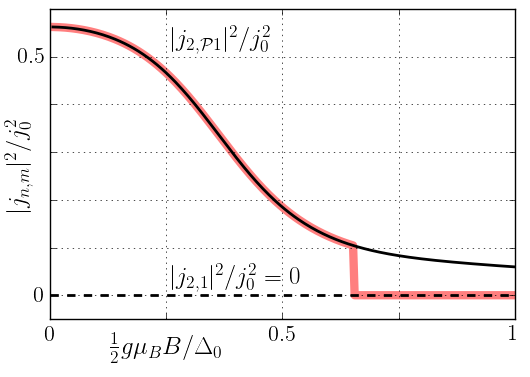

In [26]:
fields = np.linspace(0, 1, 300)
fig, ax = plt.subplots()
ax.plot(fields, np.abs(field_scan_high_mu[1][3])**2, lw=6, c='r', alpha=0.5)
ax.plot(fields, np.abs(field_scan_high_mu[1][3])**2+np.abs(field_scan_high_mu[1][2])**2, lw =2, c='k')
ax.axhline(0, c='k', lw=2, ls='--')
ax.set_ylim([-0.05, 0.6])
ax.grid()
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_yticklabels([r'$0$', '', '', '', '', r'$0.5$'])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels([r'$0$', '', r'$0.5$', '', r'$1$'])
ax.set_xlabel(r'$\frac{1}{2}g\mu_BB/\Delta_0$', x=0.25, labelpad=-5)
ax.text(0.26, 0.51, r'$|j_{2,\mathcal{P}1}|^2/j_0^2$')
ax.text(0.26, 0.01, r'$|j_{2,1}|^2/j_0^2=0$')
ax.set_ylabel(r'$|j_{n,m}|^2/j_0^2$', x=0.25, labelpad=-15)

## Magnetic field dependence of the spectrum: low chemical potential regime

In [29]:
p_lowmu = awm.SimpleNamespace(c=0, phi=3*np.pi/4, tau=0.75, b=0, regime='high_so')
field_scan_low_mu = awm.one_parameter_scan(p_lowmu, 'b', 0, 2, 400, plot=False, nsamples=500)

In [30]:
fields = np.linspace(0, 2, 400)
gaps = []
for b in fields:
    p_lowmu.b = b
    gaps.append(awm.compute_gap(p_lowmu))
gaps = np.array(gaps)
bound_state_energies = field_scan_low_mu[0]
avg_energies = np.mean(bound_state_energies, axis=0)
diff_energies = np.diff(bound_state_energies, axis=0)[0]

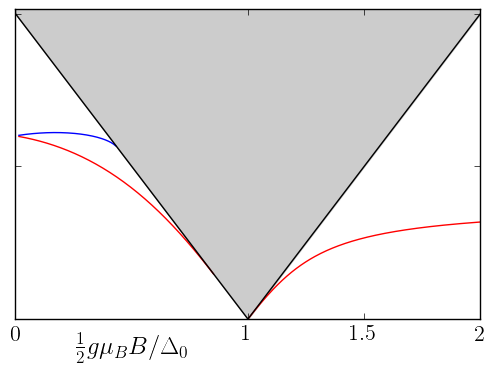

In [31]:
plt.plot(fields, bound_state_energies[0], c='r')
plt.plot(fields, bound_state_energies[1], c='b')
plt.plot(fields, gaps, c='k')
plt.fill_between(fields, gaps, 1.02, color='k', alpha=0.2)
plt.xticks([0, 1, 1.5, 2], [r'$0$', r'$1$', r'$1.5$', r'$2$'])
plt.xlim([0, 2])
plt.yticks([0, 0.5, 1], [r'', r'', r''])
plt.ylim([0, 1.015])
plt.xlabel(r'$\frac{1}{2}g\mu_BB/\Delta_0$', x=0.25, labelpad=-5)
plt.savefig('../fig_abs_vs_field_low_mu.pdf', bbox_inches='tight')

## Study of fermion parity switches

In [40]:
# The next two functions are used to find fermion parity switches in the Andreev spectra.
def find_parity_switches(p, bmin, bmax, thres=1e-4, plot=False, nsamples=1000):
    # Internal function which returns a sample of the
    # determinant function for which we want to determine
    # the roots.
    def f_det(b):
        p.b = b[0]
        return awm.bound_state_determinant(0., p)
    
    bopt, f0 = fmin(f_det, x0=np.sqrt(1-p.tau), full_output=1, disp=0)[:2]
    b0 = bopt[0]
    
    # Checks that the energy is indeed close to zero
    p.b = b0
    en = min(awm.find_abs_energies(p), default=np.nan)
    if en > thres:
        return np.nan
    else:
        return b0


def yswitch_vs_so(tau, phi, amin, amax, npoints, regime='high_s0',
                  bmin=0, bmax=1, thres=1e-6, plot=True, savefig=False):
    p = awm.SimpleNamespace(tau=tau, phi=phi, regime=regime)
    avals = np.linspace(amin, amax, npoints)
    bs_switch = []
    for a in avals:
        p.a = a
        bsw = find_parity_switches(p, bmin, bmax, thres)
        bs_switch.append(bsw)
    if plot:
        plt.plot(aas, bs_switch)
        plt.xlim([amin, amax])
        plt.ylim([bmin, bmax])   
    return np.array(bs_switch)

In [43]:
taus = np.arange(0.2, 1.0, 0.1)
sols = []
for tau in taus:
    sols.append(yswitch_vs_so(tau, np.pi, 1e-2, 2, npoints=50,
                              regime='high_mu', bmin=0, bmax=10, thres=1e-3, plot=False))

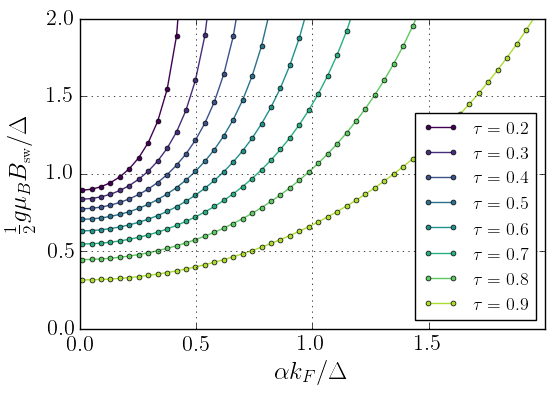

In [44]:
taus = np.arange(0.2, 1.0, 0.1)
zs = np.linspace(1e-2, 2, 50)
for (i, (s, tau)) in enumerate(zip(sols, taus)):
    c = cm.viridis(i/len(sols),1)
    plt.plot(zs, s, ls='-', marker='o', markersize=3.5, color=c, label=r'$\tau=%s$' % tau)
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.xticks([0., 0.5, 1, 1.5])
plt.grid()
plt.xlabel(r'$\alpha k_F/\Delta$')
plt.ylabel(r'$\frac{1}{2}g\mu_B B_\textrm{\normalsize{sw}}/\Delta$')
plt.legend(loc=4,prop={'size':13})

## Temperature dependence of the current-phase relation at different magnetic fields

In [45]:
bs = [0., 0.25, 0.5, 0.75]
energies_vs_phase_highmu = []
currents_vs_phase_highmu = []
for b in bs:
    p_highmu.b = b
    es, js = awm.one_parameter_scan(p_highmu, "phi", 0, 2*np.pi, 150, plot=False, nsamples=1000)
    energies_vs_phase_highmu.append(es)
    currents_vs_phase_highmu.append(js)

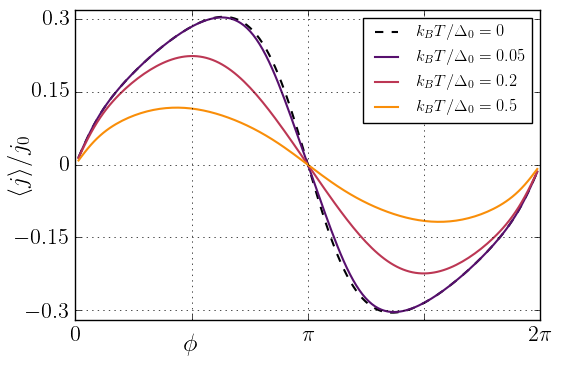

In [47]:
Ts = [0, 0.05, 0.2, 0.5]
phases = np.linspace(0, 2*np.pi, 150)
plt.figure()
for (i, T) in enumerate(Ts):
    js = []
    for (n, phi) in enumerate(phases):
        ens = energies_vs_phase_highmu[2].T[n]
        cur = currents_vs_phase_highmu[2].T[n]
        js.append(awm.equilibrium_current(ens, cur[0], cur[1], 1, T))
    c = cm.inferno(i/len(Ts), 1)
    sty = '--' if i==0 else '-'
    plt.plot(phases, js, color=c, ls=sty, lw=1.5, label=r'$k_BT/\Delta_0=%s$' % T)
plt.xlim([0, 2*np.pi])
plt.ylim([-0.32, 0.32])
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r'$0$', '', r'$\pi$', '', r'$2\pi$'])
plt.yticks([-0.3, -0.15, 0, 0.15, 0.3], [r'$-0.3$', r'$-0.15$', r'$0$', r'$0.15$', r'$0.3$'])
plt.xlabel(r'$\phi$', x=0.25, labelpad=-8)
plt.ylabel(r'$\langle j\rangle/j_0$', labelpad=-15)
plt.legend(fontsize=12)
plt.grid()

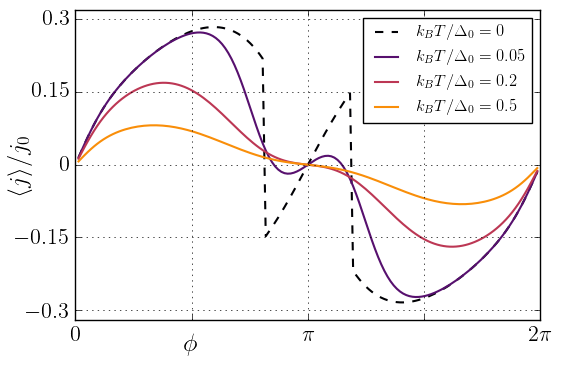

In [67]:
plt.figure()
for (i, T) in enumerate(Ts):
    js = []
    for (n, phi) in enumerate(phases):
        ens = energies_vs_phase_highmu[3].T[n]
        cur = currents_vs_phase_highmu[3].T[n]
        js.append(awm.equilibrium_current(ens, cur[0], cur[1], T))
    c = cm.inferno(i/len(Ts), 1)
    sty = '--' if i==0 else '-'
    plt.plot(phases, js, color=c, ls=sty, lw=1.5, label=r'$k_BT/\Delta_0=%s$' % T)
plt.xlim([0, 2*np.pi])
plt.ylim([-0.32, 0.32])
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r'$0$', '', r'$\pi$', '', r'$2\pi$'])
plt.yticks([-0.3, -0.15, 0, 0.15, 0.3], [r'$-0.3$', r'$-0.15$', r'$0$', r'$0.15$', r'$0.3$'])
plt.xlabel(r'$\phi$', x=0.25, labelpad=-8)
plt.ylabel(r'$\langle j\rangle/j_0$', labelpad=-15)
plt.legend(fontsize=12)
plt.grid()

## Phase and magnetic field dependence of $|j_{2,\mathcal{P}1}|^2$, high chemical potential regime

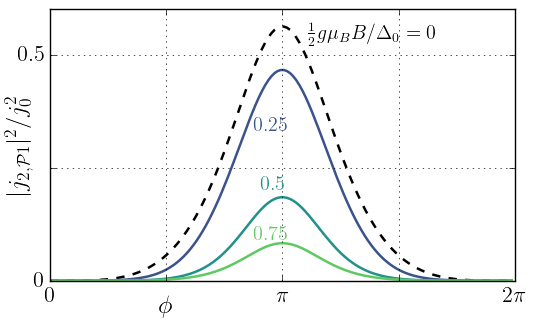

In [68]:
fig, ax = plt.subplots(figsize=(6,3.5))
colors = ['k'] + [cm.viridis(n/len(currents_vs_phase_highmu), 1) for n in range(1,4)]
for (n, (b, js, c)) in enumerate(zip(bs, currents_vs_phase_highmu, colors)):
    cur = np.abs(js[3])**2 + np.abs(js[2])**2
    sty = '--' if n==0 else '-'
    ax.plot(phases, cur, color=c, ls=sty, lw=1.8, label=r'$\frac{1}{2}g\mu_B B/\Delta_0=%s$' % b)
ax.text(np.pi+0.35, 0.52, r'\Large{$\frac{1}{2}g\mu_B B/\Delta_0=0$}', color=colors[0])
ax.text(np.pi-0.4, 0.34, r'\Large{$0.25$}', color=colors[1],verticalalignment='center')
ax.text(np.pi-0.3, 0.21, r'\Large{$0.5$}', color=colors[2],verticalalignment='center')
ax.text(np.pi-0.4, 0.1, r'\Large{$0.75$}', color=colors[3],verticalalignment='center')
ax.set_xlim([0, 2*np.pi])
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels([r'$0$', '', r'$\pi$', '', r'$2\pi$'])
ax.set_yticks([0, 0.25, 0.5])
ax.set_yticklabels([r'$0$', '', r'$0.5$'])
ax.set_xlabel(r'$\phi$', x=0.25, labelpad=-8)
ax.set_ylabel(r'$|j_{2,\mathcal{P}1}|^2/j^2_0$', labelpad=-15)
ax.grid()

## Chemical potential dependence of  current matrix elements at different magnetic fields

In [ ]:
p = awm.SimpleNamespace(b=0.5, phi=np.pi, regime='high_so', c=0., tau=0.75)
bs = [0.1, 0.2, 0.3, 0.4]
energies_vs_b_pi = []
currents_vs_b_pi = []
for b in bs:
    p.b = b
    es, js = awm.one_parameter_scan(p, "c", 1e-3, 1.5, 100, plot=False, nsamples=1000)
    energies_vs_b_pi.append(es)
    currents_vs_b_pi.append(js)

In [ ]:
bs = [0.1, 0.2, 0.3, 0.4]
cs = np.linspace(1e-3, 1.5, 100)
f, ax = plt.subplots(figsize=(6, 3.5))
for (i, (js, b)) in enumerate(zip(currents_vs_b_pi, bs)):
    c = cm.viridis(i/len(bs),1)
    mask = np.isfinite(np.abs(js[3]))
    ax.plot(cs[mask], np.abs(js[3][mask])**2/ykos(p),linestyle='-', marker='.',
             color=c,)
ax.text(0.05, 0.95, r'\Large{$\frac{1}{2}g\mu_B B/\Delta_0=0.1$}', color=cm.viridis(0.,1))
ax.text(0.05, 0.91, r'\Large{$0.2$}', color=cm.viridis(0.25,1))
ax.text(0.05, 0.82, r'\Large{$0.3$}', color=cm.viridis(0.5,1))
ax.text(0.05, 0.72, r'\Large{$0.4$}', color=cm.viridis(0.75,1))
ax.set_xlim([0, 1.5])
ax.set_ylim([0.7, 1.02])
ax.set_xticks([0, 0.5, 1, 1.5])
ax.set_yticks([0.75, 0.875, 1])
ax.set_yticklabels([r'$0.75$', '', r'$1$'])
ax.set_xlabel(r"$\mu/\Delta_0$", labelpad=-5)
ax.set_ylabel(r"$|j_{2,\mathcal{P}1}|^2/|j^{(B=0)}_{2,\mathcal{P}1}|^2$", y = 0.6, labelpad=-15)
ax.grid()
ax.set_xticklabels([r"$0$", r"$0.5$", r"$1$", r"$1.5$"])

In [ ]:
p = awm.SimpleNamespace(b=0.2, phi=np.pi, regime='high_so', c=0., tau=0.75)
energies_vs_mu_at_high_mu, currents_vs_mu_at_high_mu = awm.one_parameter_scan(p, "c", 1, 10, 50, plot=True, nsamples=1000)

In [ ]:
cs = np.linspace(1, 10, 50)
js = np.abs(currents_vs_mu_at_high_mu[2])
coeffs = np.polyfit(np.log10(cs), np.log10(js), deg=1)
coeffs[0]=-2
poly = np.poly1d(coeffs)
print(coeffs)
f, ax = plt.subplots()
ax.loglog(cs, js, linestyle='-', marker='.', c='k')
ax.loglog(cs[1:], 10**poly(np.log10(cs[1:])), c='r', ls='--', lw=1.2)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')
ax.set_xlabel(r"$\mu/\Delta_0$", labelpad=-10)
ax.set_ylabel(r"$|j_{2,1}|/j_0$", y=0.26, labelpad=-17)
ax.set_xticklabels(["", "1", "10"])

## Magnetic field dependence of current matrix elements, at different chemical potentials

In [ ]:
p = awm.SimpleNamespace(b=0.5, phi=np.pi, regime='high_so', c=0., tau=0.75)
cs = [0, 1, 2, 3]
energies_vs_b_varying_mu = []
currents_vs_b_varying_mu = []
for c in cs:
    p.c = c
    es, js = awm.one_parameter_scan(p, "b", 0., 0.5, 100, plot=True, nsamples=1000)
    energies_vs_b_varying_mu.append(es)
    currents_vs_b_varying_mu.append(js)